In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

Saving f.csv to f.csv


In [11]:
fandango=pd.read_csv('f.csv')
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [12]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [13]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


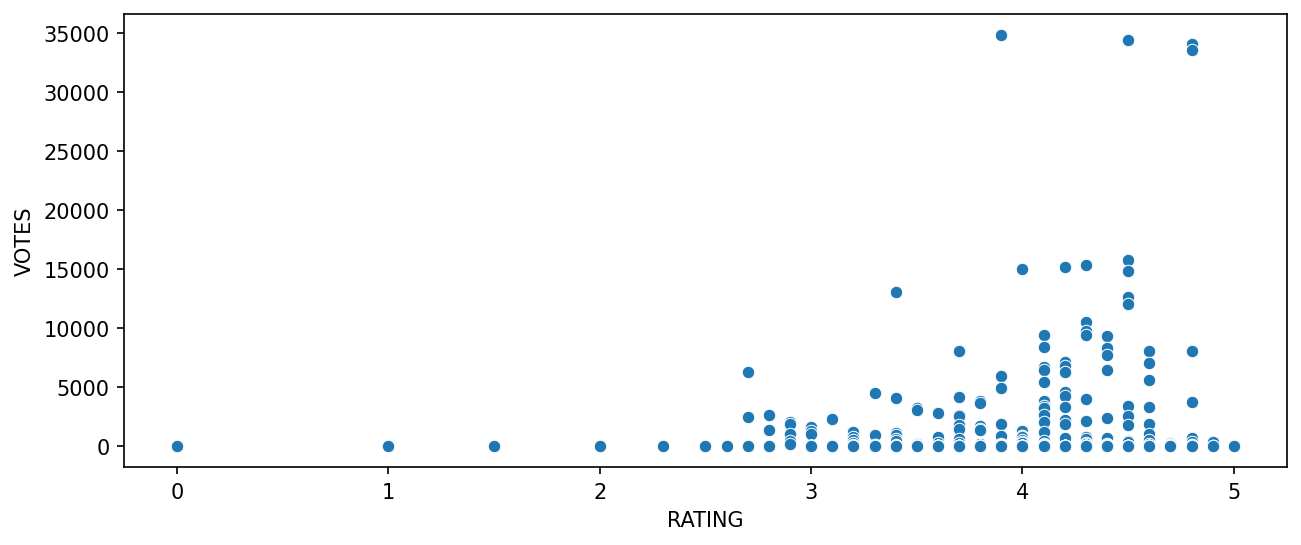

In [15]:
##creating scatter plot to show relationship between rating and votes
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandango,y='VOTES',x='RATING')

In [16]:
##Correlation between columns
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [17]:
##there is some misleading between stars being showed to users on website with the ratings of the movie
##creating a new column name YEAR that is associated with film name
##spliting the year attached with film name
title='Film Title Name (Year)'

In [19]:
title.split('(')[-1].replace(')',"")

'Year'

In [20]:
fandango['YEAR']=fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',"") )

In [21]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [27]:
##to count on how many films are their in fandango website in one particular year
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

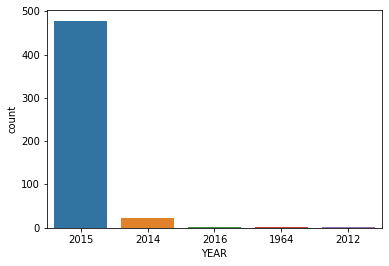

In [29]:
##visualize the count of movies per year
sns.countplot(data=fandango,x='YEAR')

In [30]:
##to estimate movies with highest number of votes
fandango.nlargest(20,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [33]:
##to see how many movies have zero votes
v=fandango['VOTES']==0
v.sum()

69

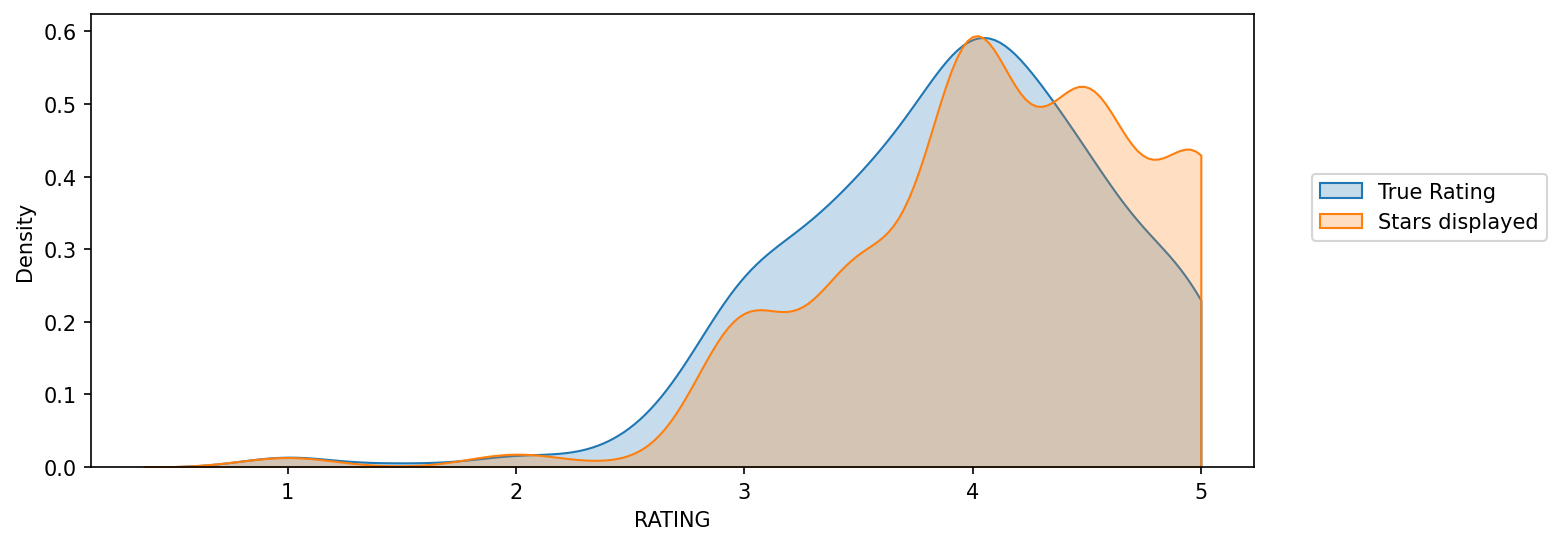

In [40]:
##creating a dataframe of only reviewed movies i.e., eliminating zeroes 
fan_review=fandango[fandango['VOTES']>0]
## due to HTML,the star rating vs the true user rating varies slightly
plt.figure(figsize=(10,4),dpi=150) 
sns.kdeplot(data=fan_review,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fan_review,x='STARS',clip=[0,5],fill=True,label='Stars displayed')
##to see the labels
plt.legend(loc=(1.05,0.5))

In [41]:
##to quantify this discrepancy
fan_review['DIFF']=fan_review['STARS']-fan_review['RATING']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
fan_review['DIFF']=fan_review['DIFF'].round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


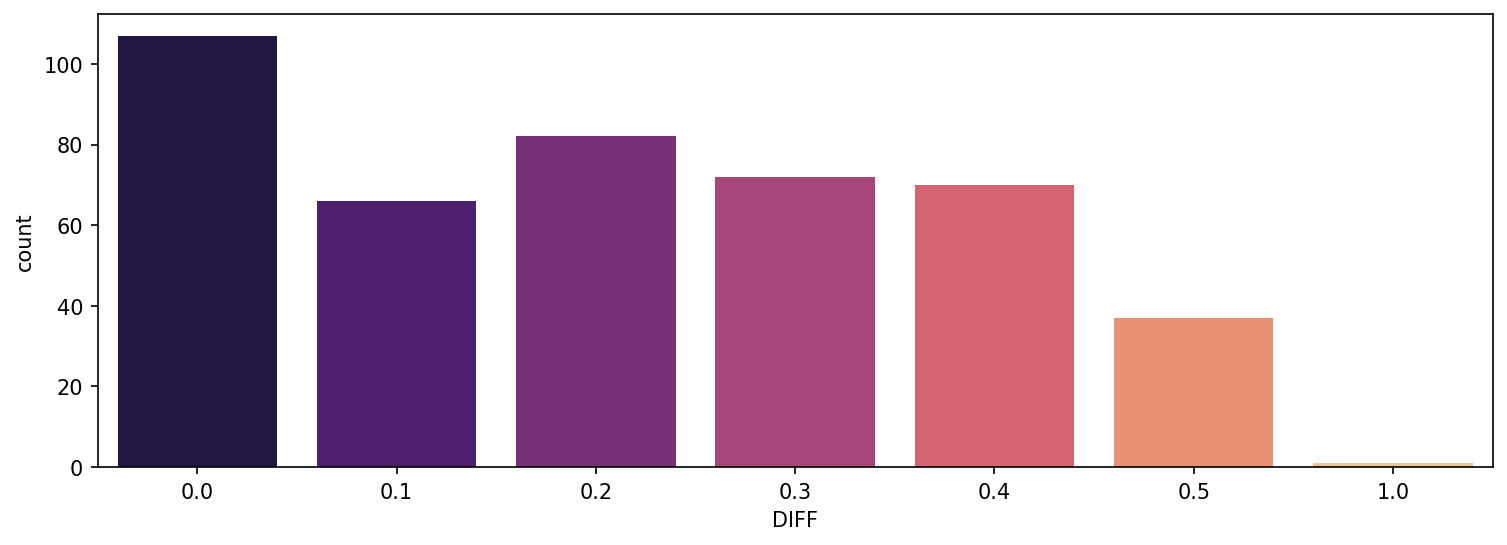

In [44]:
##to visualize the number of times the certain difference occurred
plt.figure(figsize=(12,4),dpi=150) 
sns.countplot(data=fan_review,x='DIFF',palette='magma')

In [45]:
##difference of 1 star is clearly visible from above count_plot
fan_review[fan_review['DIFF']==1]


,FILM,STARS,RATING,VOTES,YEAR,DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [46]:
##comparing fandango rating with other site movie rating website
from google.colab import files
uploaded = files.upload()

Saving all_sites_scores.csv to all_sites_scores.csv


In [47]:
new=pd.read_csv('all_sites_scores.csv')

In [48]:
new.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [49]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [50]:
new.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


(0.0, 100.0)

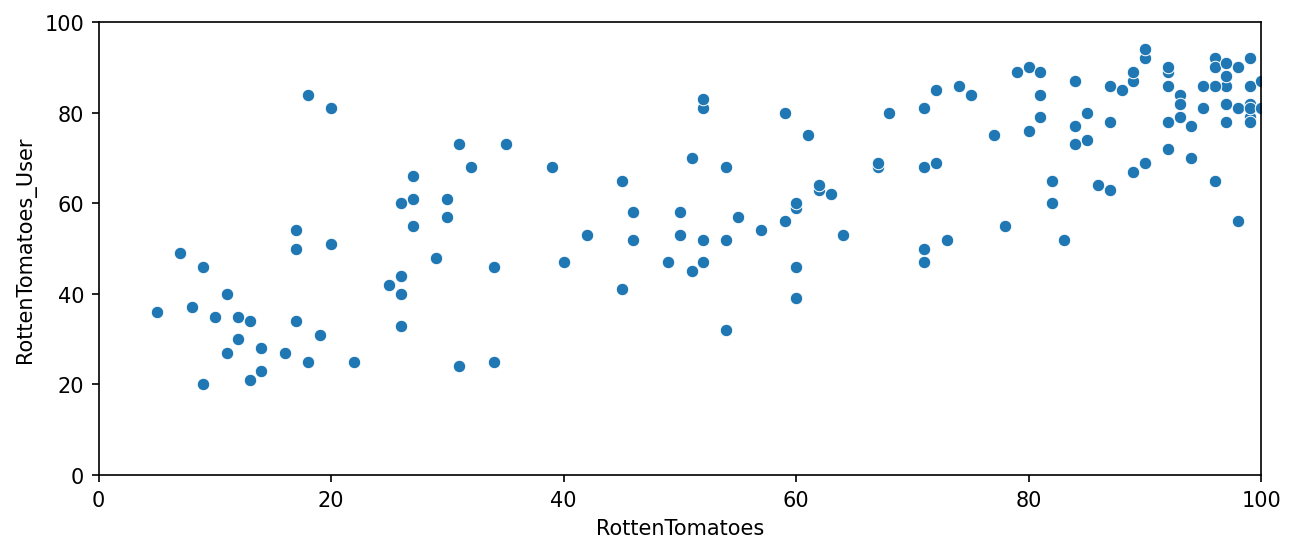

In [55]:
##In the above data set, addressing the website rotten_tomatoes which has two kind of reviews....i.e., their critics review and user reviews
## creating a scatter plot to see the relationship between the two kind of reviews
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=new,x='RottenTomatoes',y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)

In [57]:
##the scatter plot shows a quite good relationship with few outliers as one can be seen clearly above the line, which means users like the movie but critics don't.
##to quantify the difference
new['DIFF']=new['RottenTomatoes']-new['RottenTomatoes_User']
##since the difference can be positive as well as negative therefore, roundinf off the differences, then taking mean of it.This will report back
##on average to absolute difference between the critics rating vs the user rating.
new['DIFF'].apply(abs).mean()

15.095890410958905

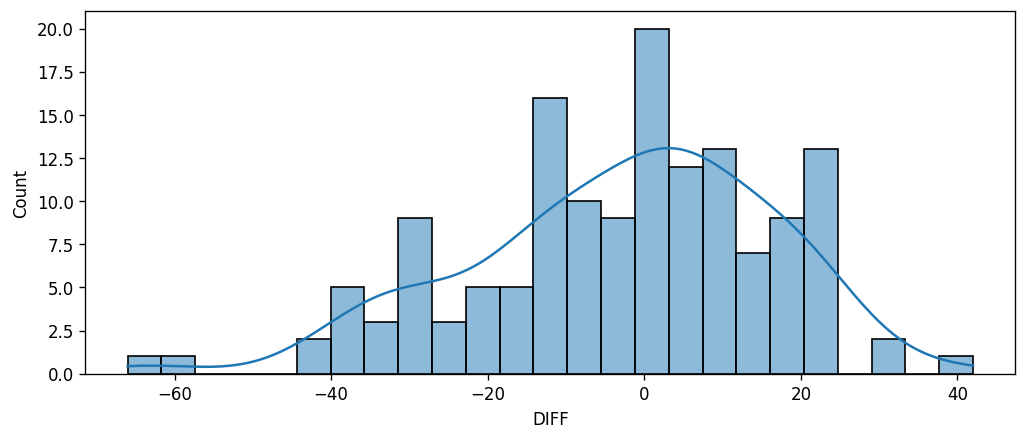

In [59]:
plt.figure(figsize=(10,4),dpi=120)
sns.histplot(data=new,x='DIFF',kde=True,bins=25)

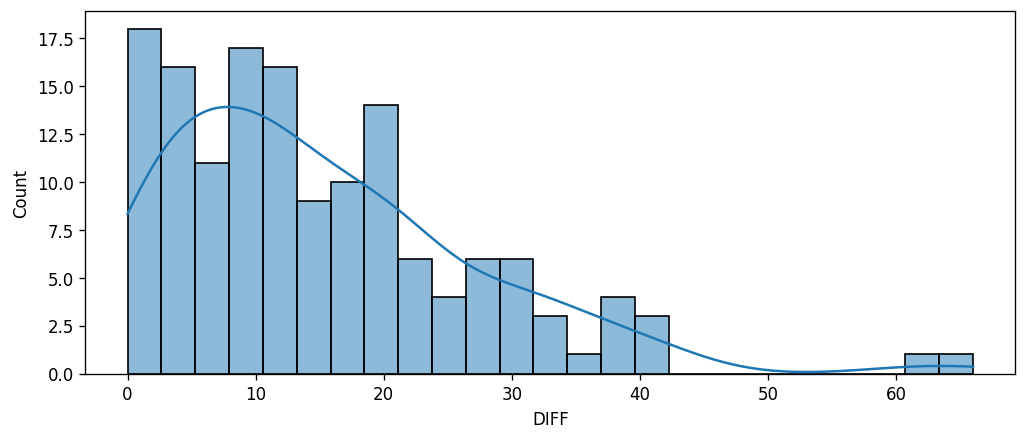

In [61]:
plt.figure(figsize=(10,4),dpi=120)
sns.histplot(x=new['DIFF'].apply(abs),kde=True,bins=25)

In [63]:
new.nsmallest(5,'DIFF')
##Top 5 movies user rated higher than critics

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,DIFF
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


In [64]:
##top 5 movies critics liked but user didn't
new.nlargest(5,'DIFF')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,DIFF
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24


(0.0, 100.0)

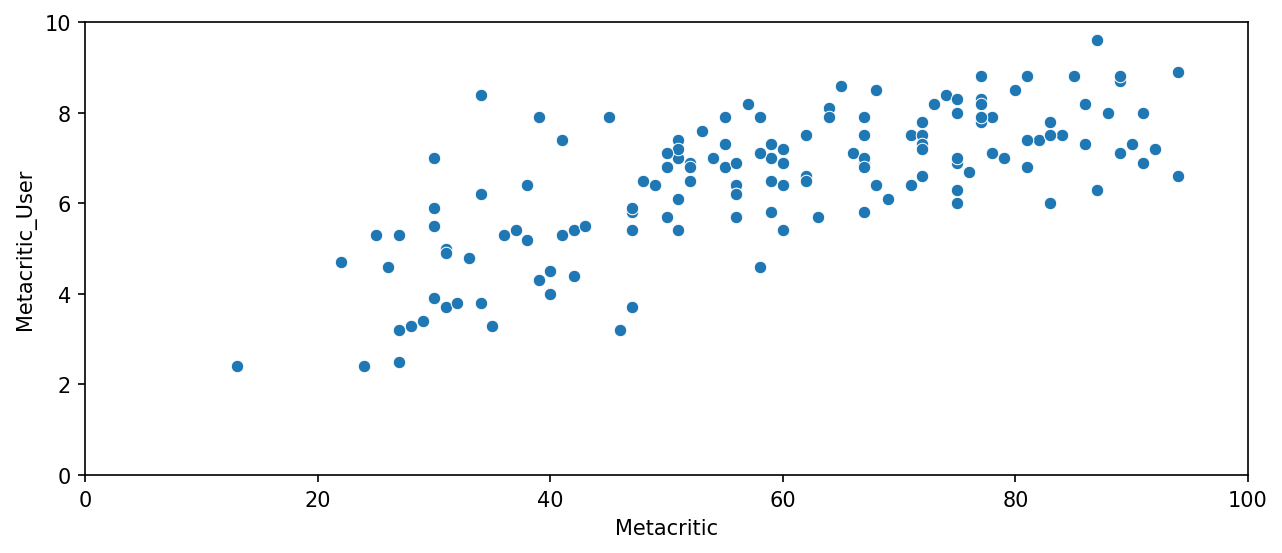

In [67]:
##Another website METACRITICS
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=new,x='Metacritic',y='Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)
##Linear positive relationship can be seen

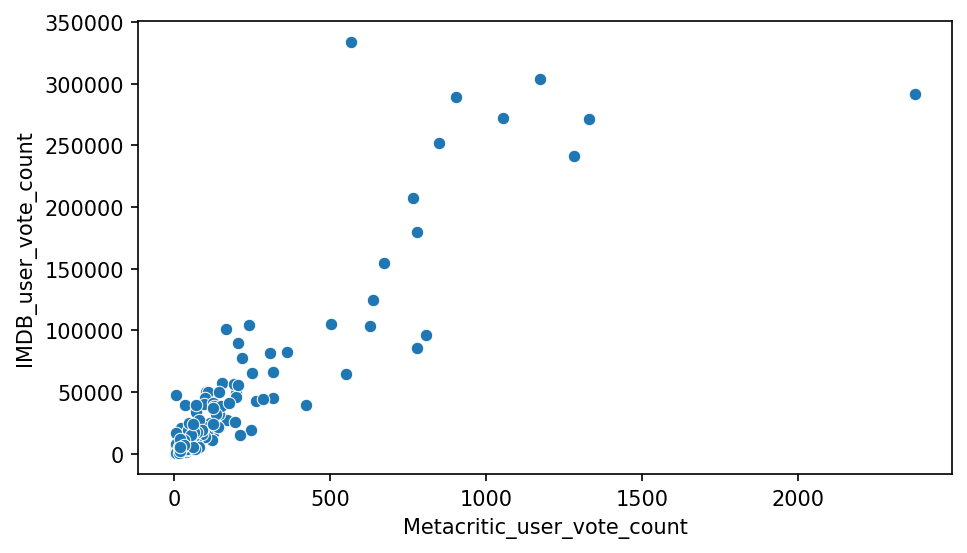

In [69]:
##website IMDB vs METACRITIC
##Relationship between vote count on IMDB vs METACRITIC
plt.figure(figsize=(7,4),dpi=150)
sns.scatterplot(data=new,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')


In [70]:
## As two outlier are seen where IMDB rating is highest and metacritic rating is around 500 and one having both the rating highest
new.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,DIFF
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [71]:
new.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,DIFF
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [72]:
df=pd.merge(fandango,new,on='FILM',how='inner')
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


In [75]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
DIFF                              42.0
Name: max, dtype: float64

In [77]:
import numpy as np
df['RT_NORM']=np.round(df['RottenTomatoes']/20,1)
df['RTU_NORM']=np.round(df['RottenTomatoes_User']/20,1)

In [79]:
df['META_NORM']=np.round(df['Metacritic']/20,1)
df['METAU_NORM']=np.round(df['Metacritic_User']/2,1)

In [80]:
df['IMDB_NORM']=np.round(df['IMDB']/2,1)

In [81]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,DIFF,RT_NORM,RTU_NORM,META_NORM,METAU_NORM,IMDB_NORM
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [82]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'DIFF', 'RT_NORM',
       'RTU_NORM', 'META_NORM', 'METAU_NORM', 'IMDB_NORM'],
      dtype='object')

In [83]:
norm_scores=df[['RT_NORM',
       'RTU_NORM', 'META_NORM', 'METAU_NORM', 'IMDB_NORM','STARS', 'RATING']]

In [84]:
norm_scores.head()

,RT_NORM,RTU_NORM,META_NORM,METAU_NORM,IMDB_NORM,STARS,RATING
0,1.2,2.1,2.3,1.6,2.1,4.0,3.9
1,3.6,4.0,3.0,3.5,3.6,4.5,4.5
2,3.6,4.2,3.6,3.3,3.7,5.0,4.8
3,4.0,4.2,3.4,3.4,3.7,5.0,4.8
4,4.9,4.5,4.7,4.4,4.3,4.5,4.5


In [98]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    


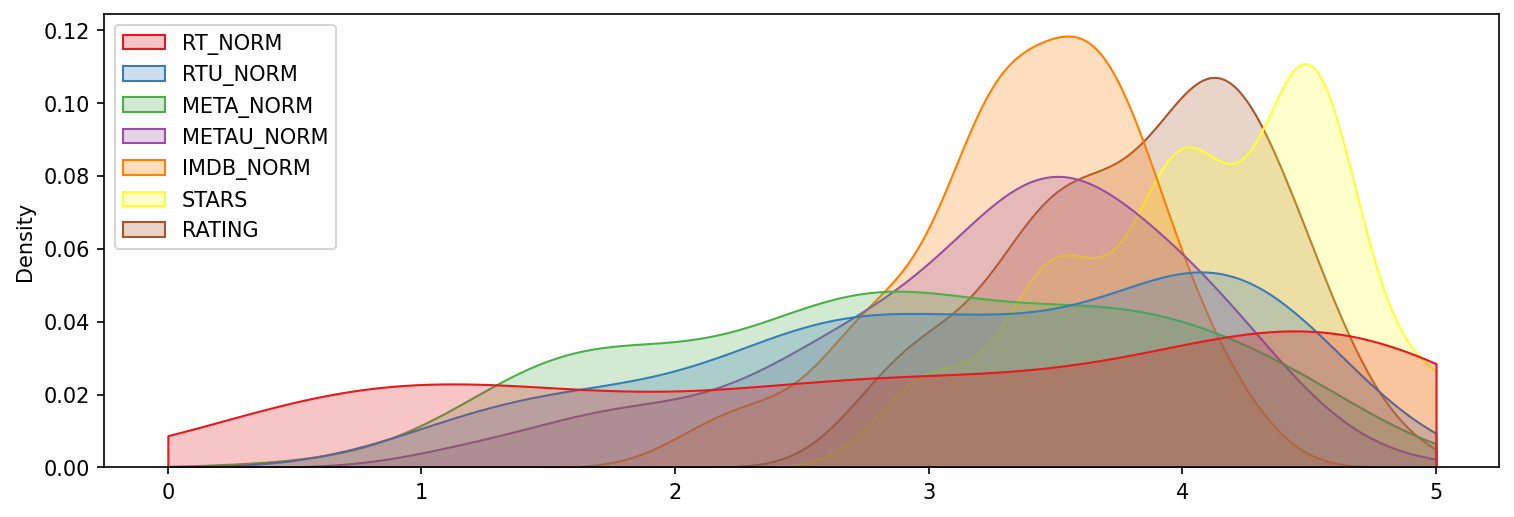

In [95]:
fig, ax = plt.subplots(figsize=(12,4),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1')
move_legend(ax, "upper left")

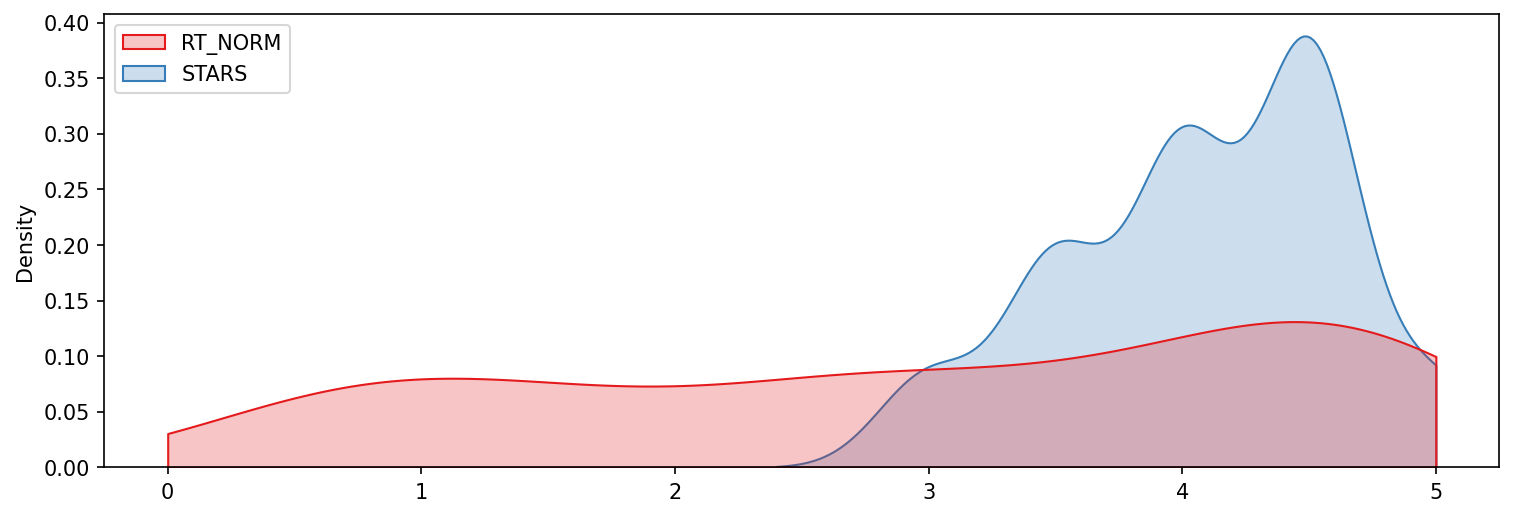

In [96]:
fig, ax = plt.subplots(figsize=(12,4),dpi=150)
sns.kdeplot(data=norm_scores[['RT_NORM','STARS']],clip=[0,5],shade=True,palette='Set1')
move_legend(ax, "upper left")

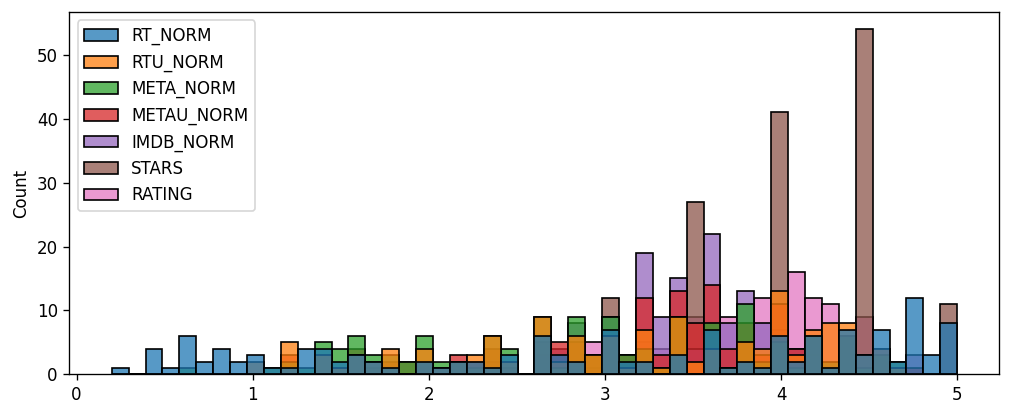

In [99]:
plt.figure(figsize=(10,4),dpi=120)
sns.histplot(norm_scores,bins=50)

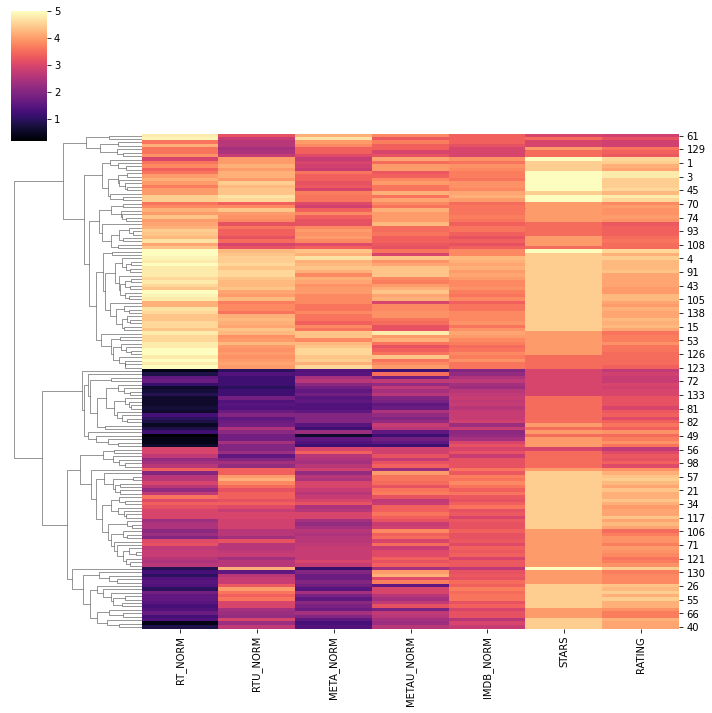

In [100]:
##worst movies rated across all the platform
sns.clustermap(norm_scores,cmap='magma',col_cluster=False)

In [101]:
##Clearly it is quite visible that fandango is rating movies much higher than the other websites
##checking for ten worst movies
norm_scores.columns

Index(['RT_NORM', 'RTU_NORM', 'META_NORM', 'METAU_NORM', 'IMDB_NORM', 'STARS',
       'RATING'],
      dtype='object')

In [102]:
norm_film=df[['FILM','RT_NORM', 'RTU_NORM', 'META_NORM', 'METAU_NORM', 'IMDB_NORM', 'STARS',
       'RATING']]

In [105]:
worst_film=norm_film.nsmallest(10,'RT_NORM')

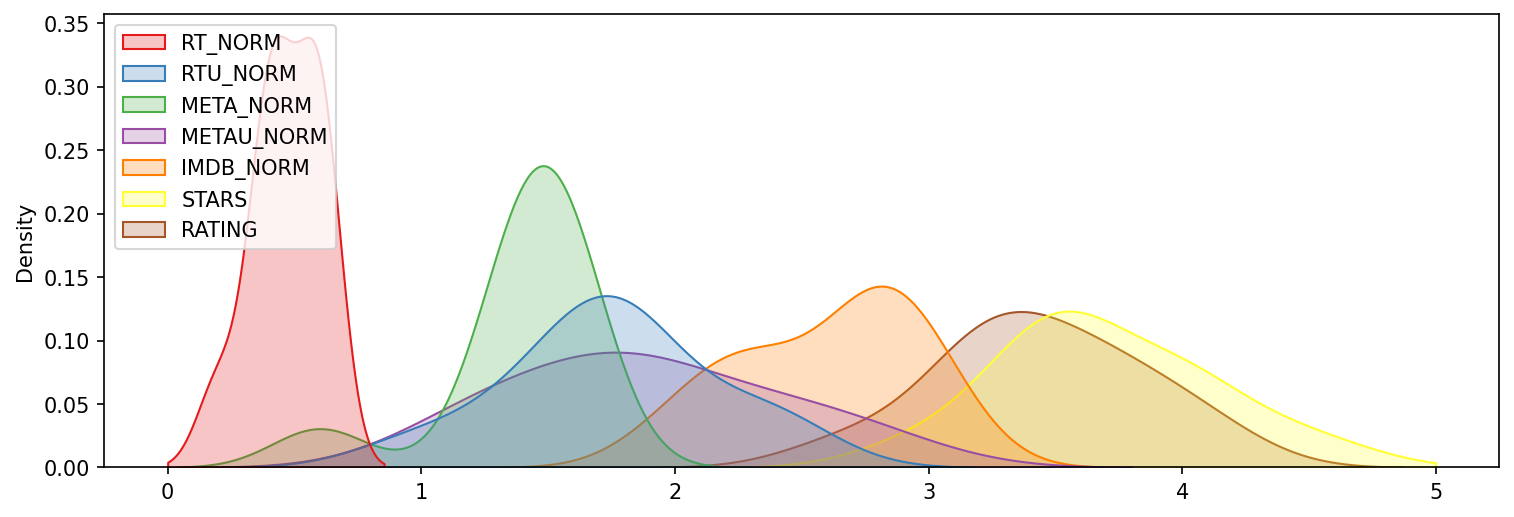

In [106]:
fig, ax = plt.subplots(figsize=(12,4),dpi=150)
sns.kdeplot(data=worst_film,clip=[0,5],shade=True,palette='Set1')
move_legend(ax, "upper left")